# Title: Data Wrangling

<b>Problem Statement:</b> Data Wrangling on Real Estate Market<br><b>Dataset</b>: "RealEstate_Prices.csv<br>
<b>Descriptinon</b>: The dataset contains information about housing prices in a specific real estate market. It includes various attributes such as property characteristics, location, sale prices, and other relevant features. The goal is to perform data wrangling to gain insights into the factors influencing housing prices and prepare the dataset for further analysis or modeling<br>

<b>Tasks to Perform<b>:
1. Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces, special characters, or renaming them for clarity.
2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g., imputation or removal).
3. Perform data merging if additional datasets with relevant information are available (e.g., neighborhood demographics or nearby amenities).
4. Filter and subset the data based on specific criteria, such as a particular time period, property type, or location.
5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or label encoding) for further analysis.
6. Aggregate the data to calculate summary statistics or derived metrics such as average sale prices by neighborhood or property type.
7. Identify and handle outliers or extreme values in the data that may affect the analysis or modeling process.

In [123]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Import the "RealEstate_Prices.csv" dataset. Clean column names

In [124]:
# Load the dataset
file_path = 'Bengaluru_House_Data.csv'
data = pd.read_csv(file_path)

# Clean column names by replacing spaces and special characters with underscores
data.columns = data.columns.str.replace(r'[^A-Za-z0-9]+', '_', regex=True)
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Task 2. Handle missing values

In [125]:
# Check for missing values
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [126]:
data = data.drop(columns=['society'])

In [127]:
data['location'] = data['location'].fillna('Unknown')
data['size'] = data['size'].fillna('Unknown')
data['bath'] = data['bath'].fillna(data['bath'].median())
data['balcony'] = data['balcony'].fillna(data['balcony'].median())

In [128]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Task 3. Perform data merging <b>if additional datasets are available</b>

In [129]:
# Example: Merging with a neighborhood dataset based on a common column, e.g., 'Neighborhood'
# additional_data = pd.read_csv('additional_data.csv')
# data = data.merge(additional_data, on='Neighborhood', how='left')

## Task 4. Filter and subset the data

In [130]:
filtered_data = real_estate_data[real_estate_data['location'] == 'Electronic City Phase II']

## Task 5. Encode Categorical Variables

In [131]:
# One-hot encoding for categorical columns with no ordinal relationship
data = pd.get_dummies(data, columns=['area_type', 'availability'])

# Label encoding for columns with a clear ordinal relationship
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Assuming 'size' is the column with an ordinal relationship
data['size'] = le.fit_transform(data['size'])

In [132]:
data1.head()

,location,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Immediate Possession,availability_Ready To Move
0,Electronic City Phase II,13,1056,2.0,1.0,39.07,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,Chikka Tirupathi,19,2600,5.0,3.0,120.00,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,Uttarahalli,16,1440,2.0,3.0,62.00,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,Lingadheeranahalli,16,1521,3.0,1.0,95.00,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,Kothanur,13,1200,2.0,1.0,51.00,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


## Task 6. Aggregate Data to Calculate Summary Statistics

In [133]:
# Calculate average sale prices by neighborhood
price_by_location = data.groupby('location')['price'].mean().reset_index()
price_by_location.head()

,location,price
0,Anekal,16.000000
1,Banaswadi,35.000000
2,Basavangudi,50.000000
3,Bhoganhalli,22.890000
4,Devarabeesana Halli,124.833333


## Task 7. Handle Outliers

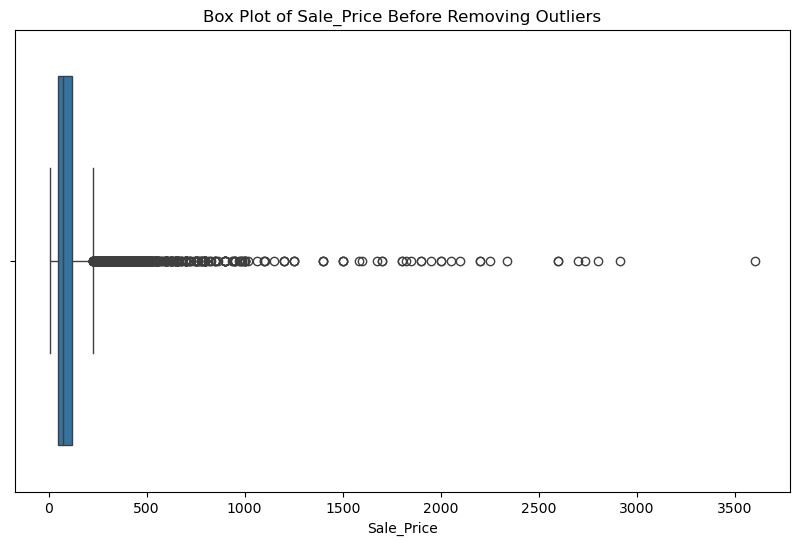

In [134]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='price')
plt.title('Box Plot of Sale_Price Before Removing Outliers')
plt.xlabel('Sale_Price')
plt.show()

In [135]:
# Remove outliers based on IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR)))]

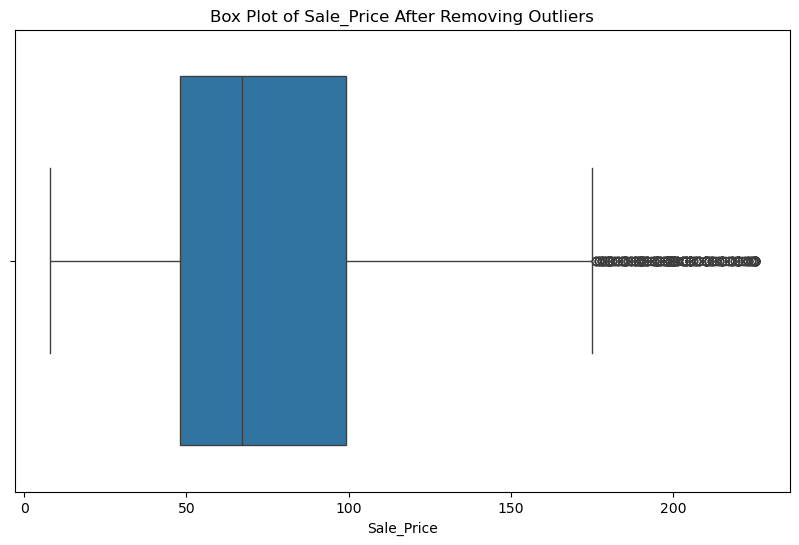

In [136]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='price')
plt.title('Box Plot of Sale_Price After Removing Outliers')
plt.xlabel('Sale_Price')
plt.show()